<a href="https://colab.research.google.com/github/freida20git/child-age-classification/blob/main/weighted_splits_inference_training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


# classes division:

In [ ]:
file_path = '/content/drive/MyDrive/age classification/data_llm.csv'
df = pd.read_csv(file_path)

In [ ]:
df

,child_text,child_age,child_name,conversation,child_gender,corpus_name,file_name,child_group,class_range
0,I got a Barbie and I like it. I have also done...,61.0,Fletcher_Claire_K,"[('INV', 'this is something my sister got for ...",female,Fletcher,ChildCorpus/Eng-UK/Fletcher/5/hnclak.cha,TD,4_6
1,""""" That one? No. I want cookie. I want cookie....",30.0,Morisset_Jenny,"[('MOT', 'look Lovey'), ('CHI', 'what?'), ('MO...",female,Morisset,ChildCorpus/Eng-NA/Morisset/Seattle/823m30.cha,"cross, toyplay, TD",2_3
2,""""" A mirror is opened up. Can't see anything? ...",29.0,Tommerdahl_ECG,"[('MOT', ""what've you got there?""), ('CHI', 'm...",female,Tommerdahl,ChildCorpus/Eng-UK/Tommerdahl/ECG2.cha,"cross, toyplay, TD",2_3
3,""" I um can't read! I don't know, no UNRECOGNIZ...",67.0,HSLLD_trire,"[('INV', 'okay you can just tell me the story ...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV3/RE/trire3.cha,"long, reading, TD",4_6
4,The boy who was going climbed over the wall fi...,71.0,Hicks_Julia,"[('EXP', 'okay this is Julia and Deborah for t...",female,Hicks,ChildCorpus/Eng-NA/Hicks/Kinder/report/rep053.cha,"cross, narrative, TD",4_6
...,...,...,...,...,...,...,...,...,...
1826,""" mhm. leaf. mhm. what this? oh. berries! he d...",45.0,HSLLD_zenbr,"[('MOT', 'okay'), ('MOT', 'this is called the ...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/BR/zenbr1.cha,"long, book, TD",3_4
1827,""" Yeah. I wanna drink some water. Are there to...",30.0,Morisset_Jeremiah,"[('MOT', 'you hungry?'), ('CHI', 'yeah'), ('MO...",male,Morisset,ChildCorpus/Eng-NA/Morisset/Topeka/184m30t.cha,"cross, toyplay, TD",2_3
1828,""" yeah! head. eyes! nose! ears! what? yeah! ok...",46.0,HSLLD_maybr,"[('MOT', ""it looks like a little worm but I th...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/BR/maybr1.cha,"long, book, TD",3_4
1829,"No, I'm not gonna play with the old one anymor...",29.0,NewEngland_Erin,"[('MOT', 'look'), ('MOT', 'look'), ('CHI', 'UN...",female,NewEngland,ChildCorpus/Eng-NA/NewEngland/32/04.cha,TD,2_3


In [ ]:
df['child_text'] = df['child_text'].str.replace('"', '', regex=False)

In [ ]:
df

,child_text,child_age,child_name,conversation,child_gender,corpus_name,file_name,child_group,class_range
0,I got a Barbie and I like it. I have also done...,61.0,Fletcher_Claire_K,"[('INV', 'this is something my sister got for ...",female,Fletcher,ChildCorpus/Eng-UK/Fletcher/5/hnclak.cha,TD,4_6
1,That one? No. I want cookie. I want cookie. M...,30.0,Morisset_Jenny,"[('MOT', 'look Lovey'), ('CHI', 'what?'), ('MO...",female,Morisset,ChildCorpus/Eng-NA/Morisset/Seattle/823m30.cha,"cross, toyplay, TD",2_3
2,A mirror is opened up. Can't see anything? Me...,29.0,Tommerdahl_ECG,"[('MOT', ""what've you got there?""), ('CHI', 'm...",female,Tommerdahl,ChildCorpus/Eng-UK/Tommerdahl/ECG2.cha,"cross, toyplay, TD",2_3
3,"I um can't read! I don't know, no UNRECOGNIZE...",67.0,HSLLD_trire,"[('INV', 'okay you can just tell me the story ...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV3/RE/trire3.cha,"long, reading, TD",4_6
4,The boy who was going climbed over the wall fi...,71.0,Hicks_Julia,"[('EXP', 'okay this is Julia and Deborah for t...",female,Hicks,ChildCorpus/Eng-NA/Hicks/Kinder/report/rep053.cha,"cross, narrative, TD",4_6
...,...,...,...,...,...,...,...,...,...
1826,mhm. leaf. mhm. what this? oh. berries! he do...,45.0,HSLLD_zenbr,"[('MOT', 'okay'), ('MOT', 'this is called the ...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/BR/zenbr1.cha,"long, book, TD",3_4
1827,Yeah. I wanna drink some water. Are there toy...,30.0,Morisset_Jeremiah,"[('MOT', 'you hungry?'), ('CHI', 'yeah'), ('MO...",male,Morisset,ChildCorpus/Eng-NA/Morisset/Topeka/184m30t.cha,"cross, toyplay, TD",2_3
1828,yeah! head. eyes! nose! ears! what? yeah! oka...,46.0,HSLLD_maybr,"[('MOT', ""it looks like a little worm but I th...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/BR/maybr1.cha,"long, book, TD",3_4
1829,"No, I'm not gonna play with the old one anymor...",29.0,NewEngland_Erin,"[('MOT', 'look'), ('MOT', 'look'), ('CHI', 'UN...",female,NewEngland,ChildCorpus/Eng-NA/NewEngland/32/04.cha,TD,2_3


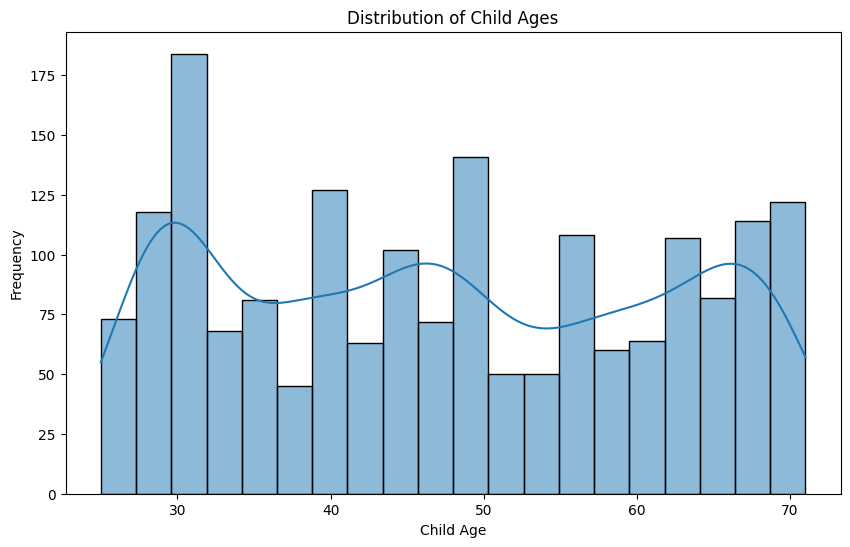

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# histogram of child ages
plt.figure(figsize=(10, 6))
sns.histplot(df['child_age'].dropna(), kde=True, bins=20)
plt.title('Distribution of Child Ages')
plt.xlabel('Child Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
bins = [24, 36, 60, 72]
labels = ["2_3", "3_5", "5_6"]

df["class_range"] = pd.cut(df["child_age"], bins=bins, labels=labels, right=True)


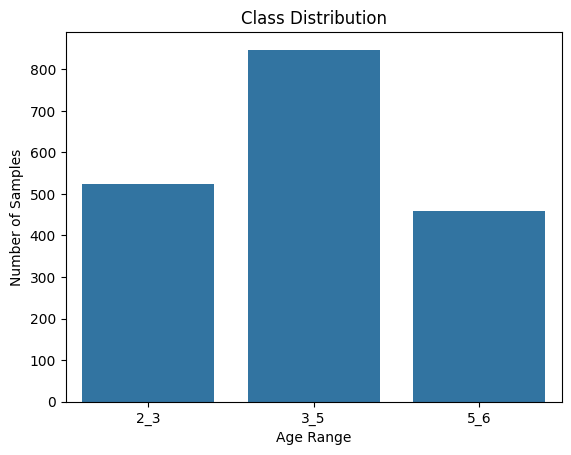

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="class_range", order=df["class_range"].cat.categories)
plt.title("Class Distribution")
plt.xlabel("Age Range")
plt.ylabel("Number of Samples")
plt.show()


In [ ]:
df

,child_text,child_age,child_name,conversation,child_gender,corpus_name,file_name,child_group,class_range
0,I got a Barbie and I like it. I have also done...,61.0,Fletcher_Claire_K,"[('INV', 'this is something my sister got for ...",female,Fletcher,ChildCorpus/Eng-UK/Fletcher/5/hnclak.cha,TD,5_6
1,That one? No. I want cookie. I want cookie. M...,30.0,Morisset_Jenny,"[('MOT', 'look Lovey'), ('CHI', 'what?'), ('MO...",female,Morisset,ChildCorpus/Eng-NA/Morisset/Seattle/823m30.cha,"cross, toyplay, TD",2_3
2,A mirror is opened up. Can't see anything? Me...,29.0,Tommerdahl_ECG,"[('MOT', ""what've you got there?""), ('CHI', 'm...",female,Tommerdahl,ChildCorpus/Eng-UK/Tommerdahl/ECG2.cha,"cross, toyplay, TD",2_3
3,"I um can't read! I don't know, no UNRECOGNIZE...",67.0,HSLLD_trire,"[('INV', 'okay you can just tell me the story ...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV3/RE/trire3.cha,"long, reading, TD",5_6
4,The boy who was going climbed over the wall fi...,71.0,Hicks_Julia,"[('EXP', 'okay this is Julia and Deborah for t...",female,Hicks,ChildCorpus/Eng-NA/Hicks/Kinder/report/rep053.cha,"cross, narrative, TD",5_6
...,...,...,...,...,...,...,...,...,...
1826,mhm. leaf. mhm. what this? oh. berries! he do...,45.0,HSLLD_zenbr,"[('MOT', 'okay'), ('MOT', 'this is called the ...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/BR/zenbr1.cha,"long, book, TD",3_5
1827,Yeah. I wanna drink some water. Are there toy...,30.0,Morisset_Jeremiah,"[('MOT', 'you hungry?'), ('CHI', 'yeah'), ('MO...",male,Morisset,ChildCorpus/Eng-NA/Morisset/Topeka/184m30t.cha,"cross, toyplay, TD",2_3
1828,yeah! head. eyes! nose! ears! what? yeah! oka...,46.0,HSLLD_maybr,"[('MOT', ""it looks like a little worm but I th...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/BR/maybr1.cha,"long, book, TD",3_5
1829,"No, I'm not gonna play with the old one anymor...",29.0,NewEngland_Erin,"[('MOT', 'look'), ('MOT', 'look'), ('CHI', 'UN...",female,NewEngland,ChildCorpus/Eng-NA/NewEngland/32/04.cha,TD,2_3


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Get unique children
unique_children = df["child_name"].unique()

# Split children into train (60%) and temp (40%)
train_children, temp_children = train_test_split(unique_children, test_size=0.4, random_state=42)

# Split temp into validation (20%) and test (20%)
val_children, test_children = train_test_split(temp_children, test_size=0.5, random_state=42)

# Assign rows to splits based on child_name
train_df = df[df["child_name"].isin(train_children)].reset_index(drop=True)
val_df   = df[df["child_name"].isin(val_children)].reset_index(drop=True)
test_df  = df[df["child_name"].isin(test_children)].reset_index(drop=True)

# sanity check
assert set(train_df["child_name"]).isdisjoint(val_df["child_name"])
assert set(train_df["child_name"]).isdisjoint(test_df["child_name"])
assert set(val_df["child_name"]).isdisjoint(test_df["child_name"])

print("Number of children in each split:")
print("Train:", train_df["child_name"].nunique())
print("Validation:", val_df["child_name"].nunique())
print("Test:", test_df["child_name"].nunique())

print("Number of rows in each split:")
print("Train:", len(train_df))
print("Validation:", len(val_df))
print("Test:", len(test_df))


Number of children in each split:
Train: 661
Validation: 221
Test: 221
Number of rows in each split:
Train: 1096
Validation: 385
Test: 350


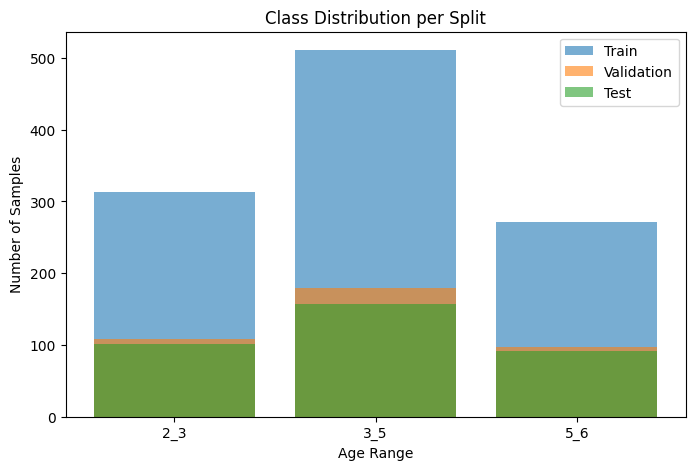

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

splits = [("Train", train_df), ("Validation", val_df), ("Test", test_df)]

plt.figure(figsize=(8,5))

for name, df_split in splits:
    counts = df_split["class_range"].value_counts().sort_index()
    plt.bar(counts.index, counts.values, alpha=0.6, label=name)

plt.title("Class Distribution per Split")
plt.xlabel("Age Range")
plt.ylabel("Number of Samples")
plt.legend()
plt.show()


In [ ]:
# Define the columns to keep
columns_to_keep = [ "child_text", "class_range"]

# Keep only those columns
train_df = train_df[columns_to_keep].copy()
val_df   = val_df[columns_to_keep].copy()
test_df  = test_df[columns_to_keep].copy()

# check columns
print("Train columns:", train_df.columns.tolist())
print("Validation columns:", val_df.columns.tolist())
print("Test columns:", test_df.columns.tolist())


Train columns: ['child_text', 'class_range']
Validation columns: ['child_text', 'class_range']
Test columns: ['child_text', 'class_range']


In [ ]:
import os

In [ ]:

train_df.to_csv(os.path.join("/content/drive/MyDrive/age classification/train_llm.csv"), index=False)
val_df.to_csv(os.path.join("/content/drive/MyDrive/age classification/validation_llm.csv"), index=False)
test_df.to_csv(os.path.join("/content/drive/MyDrive/age classification/test_llm.csv"), index=False)

print("Datasets saved successfully!")

Datasets saved successfully!


# fine tuning

In [ ]:
# Install Pytorch & other libraries
%pip install "torch==2.5.0" "torchvision==0.20.0"
%pip install "setuptools<71.0.0" scikit-learn

# Install Hugging Face libraries
%pip install  --upgrade \
  "datasets==3.1.0" \
  "accelerate==1.2.1" \
  "hf-transfer==0.1.8"

# ModernBERT is not yet available in an official release, so we need to install it from github
%pip install "git+https://github.com/huggingface/transformers.git@6e0515e99c39444caae39472ee1b2fd76ece32f1" --upgrade


In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback, AutoConfig
import numpy as np
import torch

In [ ]:
from sklearn.metrics import accuracy_score, f1_score


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
'''
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        # inputs: [batch_size, num_classes], raw logits
        # targets: [batch_size], integer class labels
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * ((1 - pt) ** self.gamma) * ce_loss
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

from transformers import Trainer

class FocalTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs["logits"]
        loss_fct = FocalLoss(alpha=1, gamma=2)
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss
'''

'\nclass FocalLoss(nn.Module):\n    def __init__(self, alpha=1, gamma=2, reduction=\'mean\'):\n        super(FocalLoss, self).__init__()\n        self.alpha = alpha\n        self.gamma = gamma\n        self.reduction = reduction\n\n    def forward(self, inputs, targets):\n        # inputs: [batch_size, num_classes], raw logits\n        # targets: [batch_size], integer class labels\n        ce_loss = F.cross_entropy(inputs, targets, reduction=\'none\')\n        pt = torch.exp(-ce_loss)\n        focal_loss = self.alpha * ((1 - pt) ** self.gamma) * ce_loss\n        if self.reduction == \'mean\':\n            return focal_loss.mean()\n        elif self.reduction == \'sum\':\n            return focal_loss.sum()\n        else:\n            return focal_loss\n\nfrom transformers import Trainer\n\nclass FocalTrainer(Trainer):\n    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):\n        labels = inputs.pop("labels")\n        outputs = model(**inputs)\n    

In [ ]:

def tokenize_function(examples):
    return tokenizer(
        examples["child_text"],
        padding="max_length",
        truncation=True,
        max_length=512
    )

# Split1:

In [ ]:
model_name = "prajjwal1/bert-tiny"
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
# Load model for classification with 3 labels
num_labels = 3

config = AutoConfig.from_pretrained(
    model_name,
    num_labels=num_labels,
    hidden_dropout_prob=0.2,   # default is 0.1, increase to 0.2–0.5 for regularization
    attention_probs_dropout_prob=0.2
)

model = AutoModelForSequenceClassification.from_pretrained(model_name, config=config)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import os
from datasets import load_dataset
data_path = "/content/drive/MyDrive/age classification/"

dataset = load_dataset('csv',
                       data_files={
                           'train': os.path.join(data_path, 'train_llm.csv'),
                           'validation': os.path.join(data_path, 'validation_llm.csv'),
                           'test': os.path.join(data_path, 'test_llm.csv')
                       })

# Map tokenization over dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)

label_map = {"2_3": 0, "3_5": 1, "5_6": 2}

def encode_labels(example):
    example["labels"] = label_map[example["class_range"]]
    return example

tokenized_datasets = tokenized_datasets.map(encode_labels)

tokenized_datasets.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/1096 [00:00<?, ? examples/s]

Map:   0%|          | 0/385 [00:00<?, ? examples/s]

Map:   0%|          | 0/350 [00:00<?, ? examples/s]

Map:   0%|          | 0/1096 [00:00<?, ? examples/s]

Map:   0%|          | 0/385 [00:00<?, ? examples/s]

Map:   0%|          | 0/350 [00:00<?, ? examples/s]

In [ ]:
from collections import Counter
import torch

# Convert labels from tensors to ints
train_labels = [int(x) for x in tokenized_datasets['train']["labels"]]

# Count properly
class_counts = Counter(train_labels)

num_classes = len(class_counts)
total_samples = sum(class_counts.values())

# Compute weights safely
class_weights = [total_samples / (num_classes * class_counts[i]) for i in range(num_classes)]

# Convert to tensor and move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

print("Class counts:", class_counts)
print("Class weights:", class_weights)


Class counts: Counter({1: 502, 0: 318, 2: 274})
Class weights: tensor([1.1468, 0.7264, 1.3309], device='cuda:0')



Class counts: Counter({2: 495, 0: 313, 1: 288})
Class weights: tensor([1.1672, 1.2685, 0.7380], device='cuda:0')

In [ ]:
#Recompute class_weights if neeeded(here division is same over all splits so no need)


In [ ]:
from transformers import Trainer
import torch.nn as nn

In [ ]:

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return {
        "accuracy": accuracy_score(p.label_ids, preds),
        "f1": f1_score(p.label_ids, preds, average="weighted")
    }


class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        # CrossEntropy with weights
        loss_fct = nn.CrossEntropyLoss(weight=class_weights) # class_weights defined in cell above
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))

        return (loss, outputs) if return_outputs else loss


In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",  # log at the end of each epoch
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=80,
    learning_rate=5e-5,
    load_best_model_at_end=True,
    report_to=[]  # disables W&B
)

early_stopping = EarlyStoppingCallback(early_stopping_patience=3)


In [ ]:
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)


In [ ]:
'''trainer = FocalTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)'''

In [ ]:
# Freeze all BERT layers
for param in model.bert.parameters():
    param.requires_grad = False

# Ensure top layer is trainable
for param in model.classifier.parameters():
    param.requires_grad = True

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.107800,1.101731,0.280519,0.159647
2,1.102800,1.097101,0.290909,0.221955
3,1.095300,1.094409,0.345455,0.342204
4,1.092100,1.092294,0.394805,0.383308
5,1.097200,1.090440,0.444156,0.374018
6,1.089100,1.088337,0.449351,0.370749
7,1.093300,1.086467,0.454545,0.431325
8,1.090600,1.084627,0.451948,0.432103
9,1.089900,1.083127,0.459740,0.432051
10,1.084600,1.081621,0.483117,0.460056


TrainOutput(global_step=5520, training_loss=1.065516275599383, metrics={'train_runtime': 70.32, 'train_samples_per_second': 1246.871, 'train_steps_per_second': 78.498, 'total_flos': 111431050199040.0, 'train_loss': 1.065516275599383, 'epoch': 80.0})

In [ ]:
#Unfreeze and train:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",  # log at the end of each epoch
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=80,
    learning_rate=2e-5,
    load_best_model_at_end=True,
    report_to=[]  # disables W&B
)

early_stopping = EarlyStoppingCallback(early_stopping_patience=4)

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return {
        "accuracy": accuracy_score(p.label_ids, preds),
        "f1": f1_score(p.label_ids, preds, average="weighted")
    }

In [ ]:

trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)




In [ ]:
'''trainer = FocalTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)'''


In [ ]:
for param in model.bert.parameters():
    param.requires_grad = True

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.379900,0.586406,0.732468,0.732260
2,0.378900,0.587783,0.748052,0.746893
3,0.357500,0.586584,0.719481,0.717661
4,0.338400,0.586055,0.729870,0.729591
5,0.335900,0.634538,0.675325,0.672358
6,0.324600,0.598565,0.742857,0.742678
7,0.304600,0.605071,0.735065,0.734520
8,0.286900,0.619259,0.727273,0.727819


TrainOutput(global_step=552, training_loss=0.3383399680040885, metrics={'train_runtime': 16.5286, 'train_samples_per_second': 5304.741, 'train_steps_per_second': 333.966, 'total_flos': 11143105019904.0, 'train_loss': 0.3383399680040885, 'epoch': 8.0})

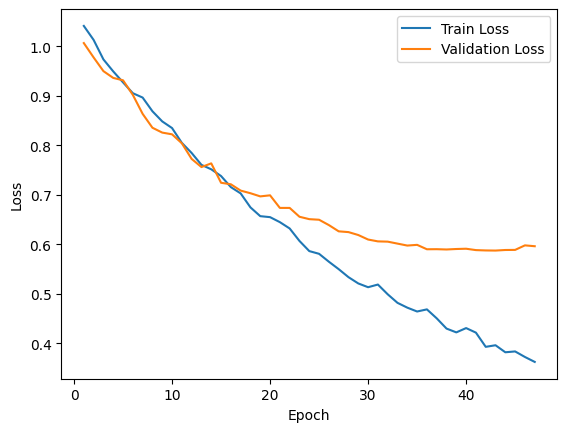

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

logs = pd.DataFrame(trainer.state.log_history)

# Extract only train and eval losses
train_logs = logs[logs['loss'].notna()]
eval_logs = logs[logs['eval_loss'].notna()]

plt.plot(train_logs['epoch'], train_logs['loss'], label='Train Loss')
plt.plot(eval_logs['epoch'], eval_logs['eval_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#validation:
predictions = trainer.predict(test_dataset=tokenized_datasets['validation'])
preds = np.argmax(predictions.predictions, axis=1)  # convert logits to class labels
labels = predictions.label_ids

from sklearn.metrics import accuracy_score, f1_score, classification_report

print("Accuracy:", accuracy_score(labels, preds))
print("F1:", f1_score(labels, preds, average="weighted"))
print(classification_report(labels, preds))


Accuracy: 0.7298701298701299
F1: 0.7295912457078821
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       109
           1       0.73      0.66      0.70       179
           2       0.65      0.76      0.70        97

    accuracy                           0.73       385
   macro avg       0.73      0.75      0.74       385
weighted avg       0.73      0.73      0.73       385



In [ ]:
#test:
predictions = trainer.predict(test_dataset=tokenized_datasets['test'])
preds = np.argmax(predictions.predictions, axis=1)  # convert logits to class labels
labels = predictions.label_ids

from sklearn.metrics import accuracy_score, f1_score, classification_report

print("Accuracy:", accuracy_score(labels, preds))
print("F1:", f1_score(labels, preds, average="weighted"))
print(classification_report(labels, preds))


Accuracy: 0.7571428571428571
F1: 0.7573979763779809
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       102
           1       0.76      0.69      0.73       157
           2       0.68      0.80      0.73        91

    accuracy                           0.76       350
   macro avg       0.76      0.77      0.76       350
weighted avg       0.76      0.76      0.76       350



In [ ]:
#trainer.save_model("/content/drive/MyDrive/age_classification/split1_model")
metrics_full = trainer.evaluate(tokenized_datasets['validation'])
print("Full validation metrics:", metrics_full)
metrics_full = trainer.evaluate(tokenized_datasets['test'])
print("Full test metrics:", metrics_full)


Full validation metrics: {'eval_loss': 0.7136520743370056, 'eval_accuracy': 0.6961038961038961, 'eval_f1': 0.6980754142518849, 'eval_runtime': 0.2688, 'eval_samples_per_second': 1432.524, 'eval_steps_per_second': 93.021, 'epoch': 20.0}
Full test metrics: {'eval_loss': 0.6780304908752441, 'eval_accuracy': 0.72, 'eval_f1': 0.7284236332657384, 'eval_runtime': 0.2085, 'eval_samples_per_second': 1678.905, 'eval_steps_per_second': 105.531, 'epoch': 20.0}


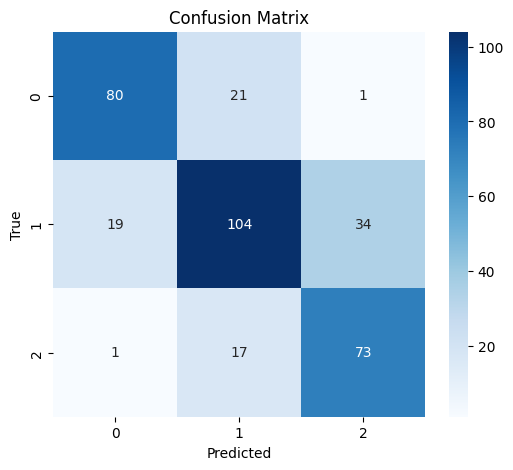

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(labels, preds)

# Plot as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#split 2

In [ ]:
model_name = "prajjwal1/bert-tiny"
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
# Load model for classification with 3 labels
num_labels = 3

from transformers import AutoConfig, AutoModelForSequenceClassification

config = AutoConfig.from_pretrained(
    model_name,
    num_labels=num_labels,
    hidden_dropout_prob=0.2,   # default is 0.1, increase to 0.2–0.5 for regularization
    attention_probs_dropout_prob=0.2
)

model = AutoModelForSequenceClassification.from_pretrained(model_name, config=config)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
data_path = "/content/drive/MyDrive/age classification/233556_data/"

dataset = load_dataset('csv',
                       data_files={
                           'train': os.path.join(data_path, 'train_llm_split2.csv'),
                           'validation': os.path.join(data_path, 'validation_llm_split2.csv'),
                           'test': os.path.join(data_path, 'test_llm_split2.csv')
                       })

# Map tokenization over dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)
label_map = {"2_3": 0, "3_5": 1, "5_6": 2}

def encode_labels(example):
    example["labels"] = label_map[example["class_range"]]
    return example

tokenized_datasets = tokenized_datasets.map(encode_labels)

tokenized_datasets.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])


Map:   0%|          | 0/337 [00:00<?, ? examples/s]

Map:   0%|          | 0/337 [00:00<?, ? examples/s]

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",  # log at the end of each epoch
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=80,
    learning_rate=5e-5,
    load_best_model_at_end=True,
    report_to=[]  # disables W&B
)

early_stopping = EarlyStoppingCallback(early_stopping_patience=4)

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return {
        "accuracy": accuracy_score(p.label_ids, preds),
        "f1": f1_score(p.label_ids, preds, average="weighted")
    }
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        # CrossEntropy with weights
        loss_fct = nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))

        return (loss, outputs) if return_outputs else loss



In [ ]:
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)

In [ ]:
'''

trainer = FocalTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)'''

In [ ]:
# Freeze all BERT layers
for param in model.bert.parameters():
    param.requires_grad = False

# Ensure top layer is trainable
for param in model.classifier.parameters():
    param.requires_grad = True
trainer.train()



Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.118400,1.126364,0.255193,0.120526
2,1.106300,1.108785,0.290801,0.196610
3,1.098200,1.099479,0.317507,0.244118
4,1.095800,1.093408,0.344214,0.297719
5,1.095800,1.090142,0.373887,0.342560
6,1.087500,1.088215,0.409496,0.369149
7,1.088800,1.086066,0.436202,0.395018
8,1.089300,1.083878,0.415430,0.412977
9,1.090300,1.082056,0.424332,0.425512
10,1.086400,1.079933,0.454006,0.456984


TrainOutput(global_step=5313, training_loss=1.0656660120522663, metrics={'train_runtime': 63.3009, 'train_samples_per_second': 1382.603, 'train_steps_per_second': 87.203, 'total_flos': 107056669784064.0, 'train_loss': 1.0656660120522663, 'epoch': 77.0})

In [ ]:
#Unfreeze and train:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",  # log at the end of each epoch
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=80,
    learning_rate=2e-5,
    load_best_model_at_end=True,
    report_to=[]  # disables W&B
)

early_stopping = EarlyStoppingCallback(early_stopping_patience=4)

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return {
        "accuracy": accuracy_score(p.label_ids, preds),
        "f1": f1_score(p.label_ids, preds, average="weighted")
    }


In [ ]:

trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)


In [ ]:

'''
trainer = FocalTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)
'''

In [ ]:
for param in model.bert.parameters():
    param.requires_grad = True

trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.497900,0.760781,0.649852,0.649566
2,0.486200,0.764969,0.632047,0.633859
3,0.464900,0.759216,0.637982,0.639190
4,0.459800,0.770021,0.652819,0.652977
5,0.450400,0.776031,0.637982,0.639010
6,0.410700,0.786778,0.629080,0.630659
7,0.407000,0.790652,0.661721,0.662305


TrainOutput(global_step=483, training_loss=0.45385495772272905, metrics={'train_runtime': 13.4514, 'train_samples_per_second': 6506.366, 'train_steps_per_second': 410.365, 'total_flos': 9732424525824.0, 'train_loss': 0.45385495772272905, 'epoch': 7.0})

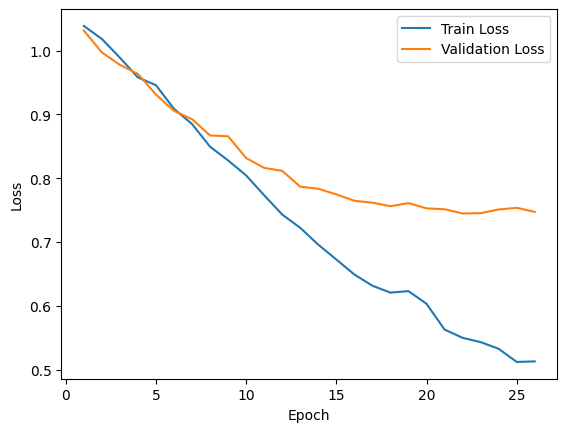

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

logs = pd.DataFrame(trainer.state.log_history)

# Extract only train and eval losses
train_logs = logs[logs['loss'].notna()]
eval_logs = logs[logs['eval_loss'].notna()]

plt.plot(train_logs['epoch'], train_logs['loss'], label='Train Loss')
plt.plot(eval_logs['epoch'], eval_logs['eval_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#validation:
predictions = trainer.predict(test_dataset=tokenized_datasets['validation'])
preds = np.argmax(predictions.predictions, axis=1)  # convert logits to class labels
labels = predictions.label_ids

from sklearn.metrics import accuracy_score, f1_score, classification_report

print("Accuracy:", accuracy_score(labels, preds))
print("F1:", f1_score(labels, preds, average="weighted"))
print(classification_report(labels, preds))


Accuracy: 0.6379821958456974
F1: 0.6391899524566081
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        83
           1       0.64      0.60      0.62       157
           2       0.57      0.66      0.61        97

    accuracy                           0.64       337
   macro avg       0.65      0.65      0.65       337
weighted avg       0.64      0.64      0.64       337



In [ ]:
#test:
predictions = trainer.predict(test_dataset=tokenized_datasets['test'])
preds = np.argmax(predictions.predictions, axis=1)  # convert logits to class labels
labels = predictions.label_ids

from sklearn.metrics import accuracy_score, f1_score, classification_report

print("Accuracy:", accuracy_score(labels, preds))
print("F1:", f1_score(labels, preds, average="weighted"))
print(classification_report(labels, preds))


Accuracy: 0.65
F1: 0.6451814336414659
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       123
           1       0.69      0.48      0.57       188
           2       0.51      0.83      0.64        89

    accuracy                           0.65       400
   macro avg       0.66      0.70      0.66       400
weighted avg       0.67      0.65      0.65       400



In [ ]:
#trainer.save_model("/content/drive/MyDrive/age_classification/split2_model")
metrics_full = trainer.evaluate(tokenized_datasets['validation'])
print("Full validation metrics:", metrics_full)
metrics_full = trainer.evaluate(tokenized_datasets['test'])
print("Full test metrics:", metrics_full)

Full validation metrics: {'eval_loss': 0.7216327786445618, 'eval_accuracy': 0.7151335311572701, 'eval_f1': 0.7187051677753876, 'eval_runtime': 0.2266, 'eval_samples_per_second': 1487.148, 'eval_steps_per_second': 97.084, 'epoch': 44.0}
Full test metrics: {'eval_loss': 0.7117266654968262, 'eval_accuracy': 0.7075, 'eval_f1': 0.7003527108228065, 'eval_runtime': 0.2282, 'eval_samples_per_second': 1752.847, 'eval_steps_per_second': 109.553, 'epoch': 44.0}


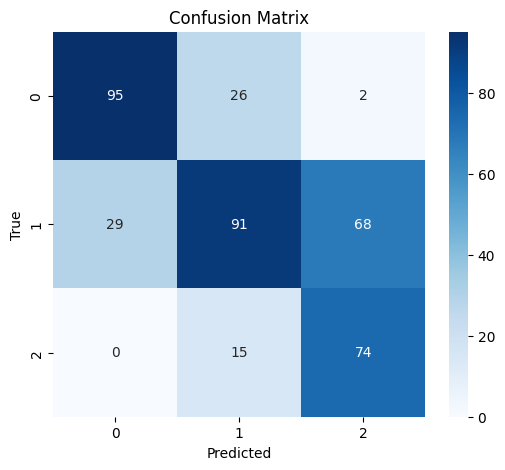

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(labels, preds)

# Plot as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Split3

In [ ]:
model_name = "prajjwal1/bert-tiny"
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
# Load model for classification with 3 labels
num_labels = 3

from transformers import AutoConfig, AutoModelForSequenceClassification

config = AutoConfig.from_pretrained(
    model_name,
    num_labels=num_labels,
    hidden_dropout_prob=0.2,   # default is 0.1, increase to 0.2–0.5 for regularization
    attention_probs_dropout_prob=0.2
)

model = AutoModelForSequenceClassification.from_pretrained(model_name, config=config)

def tokenize_function(examples):
    return tokenizer(
        examples["child_text"],
        padding="max_length",  # pad to max_length
        truncation=True,       # truncate longer text
        max_length=512          # adjust if needed
    )

import os
from datasets import load_dataset
data_path = "/content/drive/MyDrive/age classification/233556_data"

dataset = load_dataset('csv',
                       data_files={
                           'train': os.path.join(data_path, 'train_llm_split3.csv'),
                           'validation': os.path.join(data_path, 'validation_llm_split3.csv'),
                           'test': os.path.join(data_path, 'test_llm_split3.csv')
                       })
# Map tokenization over dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)

label_map = {"2_3": 0, "3_5": 1, "5_6": 2}

def encode_labels(example):
    example["labels"] = label_map[example["class_range"]]
    return example

tokenized_datasets = tokenized_datasets.map(encode_labels)

tokenized_datasets.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/1095 [00:00<?, ? examples/s]

Map:   0%|          | 0/383 [00:00<?, ? examples/s]

Map:   0%|          | 0/353 [00:00<?, ? examples/s]

Map:   0%|          | 0/1095 [00:00<?, ? examples/s]

Map:   0%|          | 0/383 [00:00<?, ? examples/s]

Map:   0%|          | 0/353 [00:00<?, ? examples/s]

In [ ]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",  # log at the end of each epoch
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=80,
    learning_rate=5e-5,
    load_best_model_at_end=True,
    report_to=[]  # disables W&B
)

early_stopping = EarlyStoppingCallback(early_stopping_patience=4)

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return {
        "accuracy": accuracy_score(p.label_ids, preds),
        "f1": f1_score(p.label_ids, preds, average="weighted")
    }

from transformers import Trainer
import torch.nn as nn

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        # CrossEntropy with weights
        loss_fct = nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))

        return (loss, outputs) if return_outputs else loss


In [ ]:

trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)




In [ ]:
# Freeze all BERT layers
for param in model.bert.parameters():
    param.requires_grad = False

# Ensure top layer is trainable
for param in model.classifier.parameters():
    param.requires_grad = True
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.104800,1.082168,0.357702,0.234980
2,1.096800,1.082158,0.436031,0.383883
3,1.094700,1.080559,0.451697,0.407196
4,1.098000,1.080411,0.488251,0.486910
5,1.092000,1.079563,0.483029,0.486769
6,1.091100,1.078632,0.462141,0.467114
7,1.088300,1.075841,0.490862,0.493557
8,1.092000,1.074929,0.483029,0.483489
9,1.089600,1.073281,0.496084,0.496299
10,1.081600,1.071782,0.496084,0.497796


TrainOutput(global_step=5520, training_loss=1.0655038736868596, metrics={'train_runtime': 68.934, 'train_samples_per_second': 1270.781, 'train_steps_per_second': 80.077, 'total_flos': 111329379532800.0, 'train_loss': 1.0655038736868596, 'epoch': 80.0})

In [ ]:
#Unfreeze and train:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",  # log at the end of each epoch
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=80,
    learning_rate=2e-5,
    load_best_model_at_end=True,
    report_to=[]  # disables W&B
)

early_stopping = EarlyStoppingCallback(early_stopping_patience=4)

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return {
        "accuracy": accuracy_score(p.label_ids, preds),
        "f1": f1_score(p.label_ids, preds, average="weighted")
    }


In [ ]:
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)


In [ ]:
for param in model.bert.parameters():
    param.requires_grad = True

trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.043900,1.001077,0.563969,0.558512
2,1.008000,0.970471,0.522193,0.500603
3,0.982200,0.949533,0.545692,0.546362
4,0.958700,0.917505,0.556136,0.551350
5,0.930500,0.895296,0.524804,0.510424
6,0.905100,0.873180,0.553525,0.532943
7,0.882100,0.855253,0.514360,0.490943
8,0.860500,0.833929,0.535248,0.510747
9,0.822900,0.821661,0.543081,0.509063
10,0.798100,0.819493,0.524804,0.501396


TrainOutput(global_step=2622, training_loss=0.6775268770009848, metrics={'train_runtime': 77.0559, 'train_samples_per_second': 1136.837, 'train_steps_per_second': 71.636, 'total_flos': 52881455278080.0, 'train_loss': 0.6775268770009848, 'epoch': 38.0})

In [ ]:
for param in model.bert.parameters():
    param.requires_grad = True

trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.297700,0.796651,0.639687,0.641894
2,0.303200,0.775926,0.668407,0.670114
3,0.273400,0.856085,0.605744,0.608579
4,0.261300,0.802952,0.665796,0.666472
5,0.253500,0.814068,0.652742,0.654325
6,0.245600,0.810382,0.660574,0.661370


TrainOutput(global_step=414, training_loss=0.27245675423295024, metrics={'train_runtime': 11.666, 'train_samples_per_second': 7508.978, 'train_steps_per_second': 473.168, 'total_flos': 8349703464960.0, 'train_loss': 0.27245675423295024, 'epoch': 6.0})

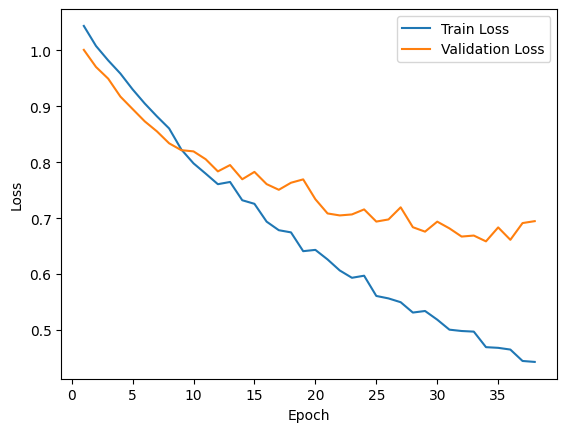

In [ ]:
logs = pd.DataFrame(trainer.state.log_history)

# Extract only train and eval losses
train_logs = logs[logs['loss'].notna()]
eval_logs = logs[logs['eval_loss'].notna()]

plt.plot(train_logs['epoch'], train_logs['loss'], label='Train Loss')
plt.plot(eval_logs['epoch'], eval_logs['eval_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#trainer.save_model("/content/drive/MyDrive/age_classification/split3_model")

metrics_full = trainer.evaluate(tokenized_datasets['test'])
print("Full model metrics:", metrics_full)


Full model metrics: {'eval_loss': 0.61453777551651, 'eval_accuracy': 0.7280453257790368, 'eval_f1': 0.7267848758614388, 'eval_runtime': 0.2477, 'eval_samples_per_second': 1425.06, 'eval_steps_per_second': 92.851, 'epoch': 6.0}


In [ ]:
#valid:
predictions = trainer.predict(test_dataset=tokenized_datasets['validation'])
preds = np.argmax(predictions.predictions, axis=1)  # convert logits to class labels
labels = predictions.label_ids

from sklearn.metrics import accuracy_score, f1_score, classification_report

print("Accuracy:", accuracy_score(labels, preds))
print("F1:", f1_score(labels, preds, average="weighted"))
print(classification_report(labels, preds))


Accuracy: 0.6684073107049608
F1: 0.6701141638318522
              precision    recall  f1-score   support

           0       0.81      0.64      0.71       127
           1       0.66      0.63      0.64       177
           2       0.56      0.81      0.66        79

    accuracy                           0.67       383
   macro avg       0.68      0.69      0.67       383
weighted avg       0.69      0.67      0.67       383



In [ ]:
#test:
predictions = trainer.predict(test_dataset=tokenized_datasets['test'])
preds = np.argmax(predictions.predictions, axis=1)  # convert logits to class labels
labels = predictions.label_ids

from sklearn.metrics import accuracy_score, f1_score, classification_report

print("Accuracy:", accuracy_score(labels, preds))
print("F1:", f1_score(labels, preds, average="weighted"))
print(classification_report(labels, preds))


Accuracy: 0.7280453257790368
F1: 0.7267848758614388
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        81
           1       0.82      0.62      0.70       180
           2       0.60      0.82      0.69        92

    accuracy                           0.73       353
   macro avg       0.73      0.77      0.74       353
weighted avg       0.75      0.73      0.73       353



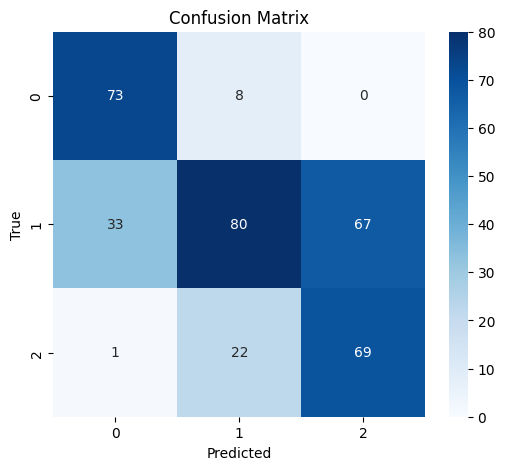

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(labels, preds)

# Plot as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# **Tiny-BERT**

AVEREGE for 2_3, 3_4, 4_6 division:
| Metric   | Split 1 | Split 2 | Split 3 | **Mean**   |
| -------- | ------- | ------- | ------- | ---------- |
| Accuracy | 0.72    | 0.71    | 0.66    | 0.69       |
| F1 score | 0.73    | 0.70    | 0.65    | 0.69       |


AVEREGE for 2_3, 3_5, 5_6 division:
| Metric   | Split 1 | Split 2 | Split 3 | **Mean**   |
| -------- | ------- | ------- | ------- | ---------- |
| Accuracy | 0.76    | 0.65    | 0.73    | 0.713      |
| F1 score | 0.76    | 0.65    | 0.73    | 0.713      |
